In [1]:
import numpy as np
import pandas as pd

# read return information
df = pd.read_csv('stocks.csv')[['ticker','date','ret']]

# cut the date to year month
df.date = df.date//100

# keep only recent 10 years
df = df[df.date>201000]

# change return to percentage points
df['ret'] = df['ret']*100

# number of stocks in our data
n = 28

In [2]:
# below code to re-construct the data from long form to short form
sample = []
for stock in set(df.ticker):
        x = df[df.ticker==stock].set_index('date').dropna()
        if len(x)>120:
            sample.append(x[['ret']].rename({'ret':stock},axis=1))

df = pd.concat(sample,axis=1)

In [3]:
# initiate equally weighted portfolio
w = [1/n]*n

$ w^t \times V \times w \$

In [4]:
# portfolio variance/std
std = np.sqrt(df.cov().mul(w,axis=0).mul(w,axis=1).sum().sum())
# portfolio return
ret = df.mul(w,axis=1).sum(axis=1).mean()*12

In [5]:
# generate random weights (between 0 and 1) and re-weight them so that total weight=1
w = np.random.rand(n)
w = w / w.sum()

In [6]:
# import math library to solve functions (like solver in Excel)
from scipy.optimize import minimize

##### the idea is that, for certain returns, we need to find the portfolio with the lowest variance

In [7]:
def std(w):
    std = np.sqrt(df.cov().mul(w,axis=0).mul(w,axis=1).sum().sum())
    return std

In [15]:
save_result = []
for target_return in range(7,40):
    print(f"getting MVP for return of {target_return}")
    res = minimize(std, # this is the function to minimise
         w, # initial weights, I set to random weights to begin with
         bounds=[(-1,3)]*n, # bounds of weights, I set between -1 and 3
         constraints=[# a list of constraints to we need to set
             # each constraint is a dict, the "fun" define a function equal to 0, 
             # below fun defines that the weight need sum to 1
             {"type":"eq","fun":lambda w:w.sum()-1}, 
             # below fun defines that return need to be equal to target return
             {"type":"eq","fun":lambda w:df.mul(w,axis=1).sum(axis=1).mean()*12-target_return},
         ]
        )
    save_result.append([res.fun,target_return])

getting MVP for return of 7
getting MVP for return of 8
getting MVP for return of 9
getting MVP for return of 10
getting MVP for return of 11
getting MVP for return of 12
getting MVP for return of 13
getting MVP for return of 14
getting MVP for return of 15
getting MVP for return of 16
getting MVP for return of 17
getting MVP for return of 18
getting MVP for return of 19
getting MVP for return of 20
getting MVP for return of 21
getting MVP for return of 22
getting MVP for return of 23
getting MVP for return of 24
getting MVP for return of 25
getting MVP for return of 26
getting MVP for return of 27
getting MVP for return of 28
getting MVP for return of 29
getting MVP for return of 30
getting MVP for return of 31
getting MVP for return of 32
getting MVP for return of 33
getting MVP for return of 34
getting MVP for return of 35
getting MVP for return of 36
getting MVP for return of 37
getting MVP for return of 38
getting MVP for return of 39


<AxesSubplot:xlabel='std'>

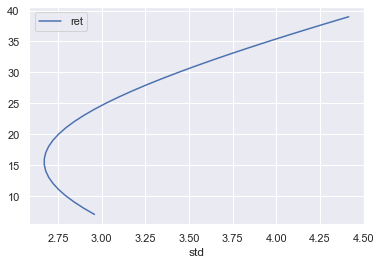

In [16]:
# build the dataframe of std and ret and plot efficient frontier
pd.DataFrame(save_result,columns=['std','ret']).plot(x='std',y='ret')